In this notebook, we learn how Matplotlib conceptualizes a visualization and what things are called. 

We learn how to create figures (total drawing areas), axes (data plotting regions), plot data, and how to label things. 

In particular, we will create the following:

* https://matplotlib.org/stable/plot_types/arrays/pcolormesh.html#sphx-glr-plot-types-arrays-pcolormesh-py
* https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py
* https://matplotlib.org/stable/plot_types/basic/bar.html#sphx-glr-plot-types-basic-bar-py

see also: 
- https://matplotlib.org/cheatsheets/
- https://matplotlib.org/stable/users/index.html

In [3]:
# import matplotlib for viz and pandas for loading data
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#load the palmer's dataset, drop missing values, and check which of our variables are numbers

df = pd.read_csv("data/penguins.csv").dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


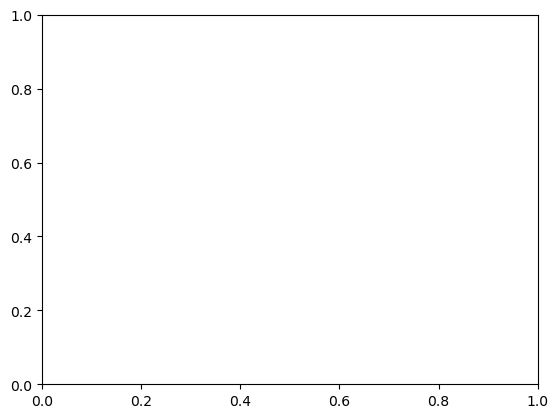

In [16]:
# let's make our drawing area using https://matplotlib.org/stable/users/explain/axes/axes_intro.html
# the subplot method returns a Figure object and axes object(s)
# axes go inside a figure because the figure is the abstraction of the canvas/total drawing area
fig, ax = plt.subplots() 

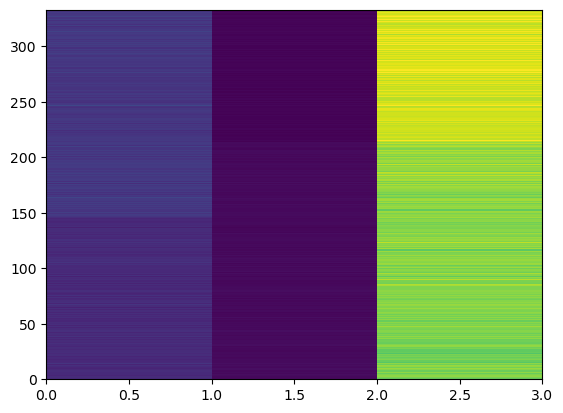

In [33]:
# let's plot our numerical values-> we use pcolormesh because it stretches the rows so we can see the colors
# data visualization methods (algorithms/idioms) are methods on ax because the Axes is the abstraction of a plotting region
fig, ax = plt.subplots()
ax.pcolormesh(df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']])

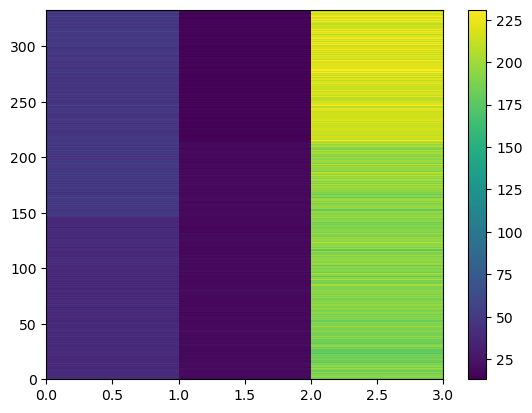

In [34]:
# what do the colors MEAN? 
# the base matplotlib object is an Artist - Artists manage the data and behavior of each visual element in the image
# Which elements of this image are artists? 
fig, ax = plt.subplots()
im = ax.pcolormesh(df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']])
fig.colorbar(im)

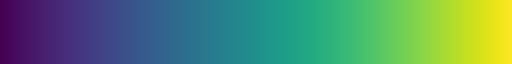

In [47]:
# We can change the color and how things are mapped ->https://matplotlib.org/stable/users/explain/colors/index.html
# let's choose one from https://matplotlib.org/stable/users/explain/colors/colormaps.html#classes-of-colormaps
cmap = None
plt.get_cmap(cmap)

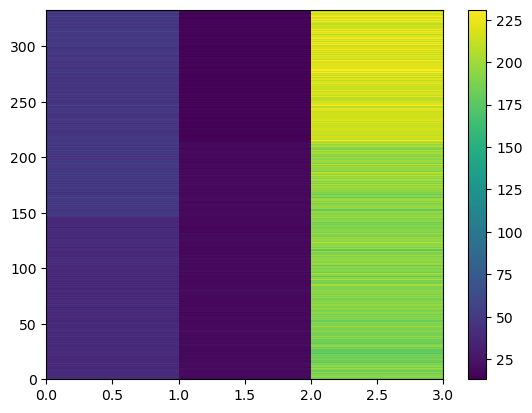

In [48]:
fig, ax = plt.subplots()
im = ax.pcolormesh(df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']], cmap=cmap)
fig.colorbar(im)

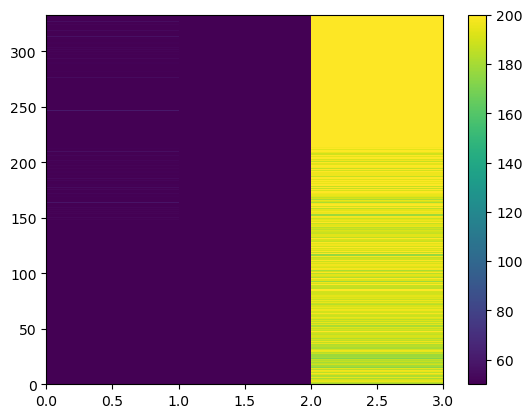

In [50]:
# let's adjust the mapping https://matplotlib.org/stable/users/explain/colors/colormapnorms.html#sphx-glr-users-explain-colors-colormapnorms-py
fig, ax = plt.subplots()
im = ax.pcolormesh(df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']], cmap=cmap, vmin=50, vmax=200)
fig.colorbar(im)

Text(0, 0.5, 'penguins')

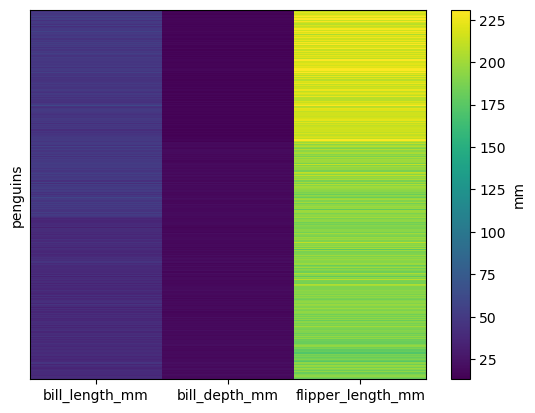

In [80]:
# lets label things!
# Axes artists, such as `ax` and the colorbar have labeling methods https://matplotlib.org/stable/users/explain/axes/axes_intro.html#axes-labelling-and-annotation

fig, ax = plt.subplots()
im = ax.pcolormesh(df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']])
cax = fig.colorbar(im)
ax.set_xticks([.5, 1.5, 2.5])
ax.set_xticklabels(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'])
cax.set_label("mm")
# how do you think we can get rid of the y ticks?
# how can we label the y axis?
ax.set_yticks([])
ax.set_ylabel("penguins")

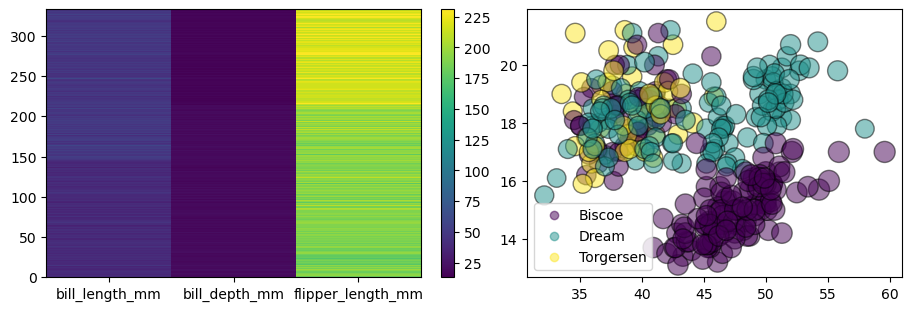

In [115]:
# How can we see if there's a pattern between the three variables?
# we use semantic layout here to help us keep track of what we're putting where https://matplotlib.org/stable/users/explain/axes/mosaic.html
# figsize is (width, height)
fig, axd = plt.subplot_mosaic([['heatmap', 'scatter']], layout='constrained', figsize=(9,3))

### all code from above
im = axd['heatmap'].pcolormesh(df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']])
cax = fig.colorbar(im)
axd['heatmap'].set_xticks([.5, 1.5, 2.5])
axd['heatmap'].set_xticklabels(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'])

# lets encode all the things! let's also play w/ this
# and label things https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html

cat_for_color = df['island'].astype('category')
sc = axd['scatter'].scatter('bill_length_mm', 'bill_depth_mm', s='flipper_length_mm', c=cat_for_color.cat.codes, alpha=.5, ec='k', data =df)
handles, labels = sc.legend_elements()
axd['scatter'].legend(handles, cat_for_color.cat.categories)

Text(0, 0.5, 'mm')

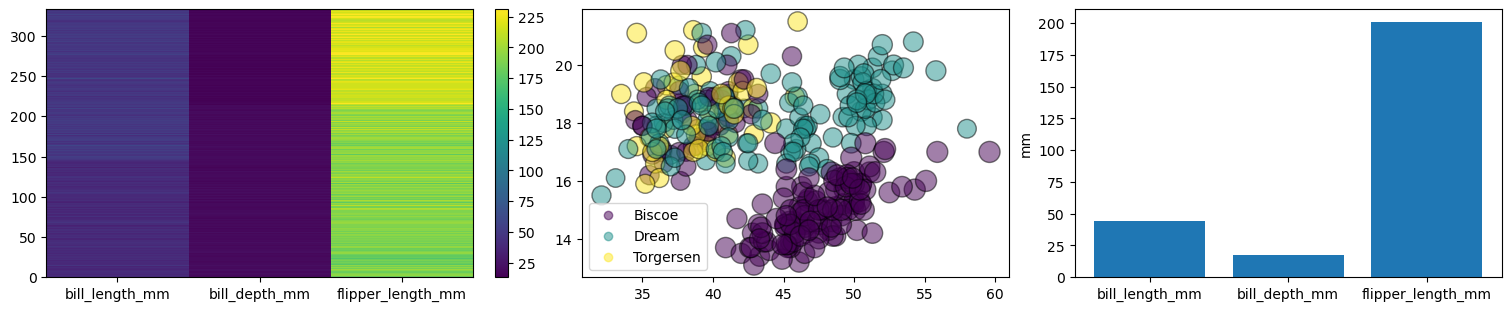

In [118]:
fig, axd = plt.subplot_mosaic([['heatmap', 'scatter', 'bar']], layout='constrained', figsize=(15,3))

### all code from above
im = axd['heatmap'].pcolormesh(df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']])
cax = fig.colorbar(im)
axd['heatmap'].set_xticks([.5, 1.5, 2.5])
axd['heatmap'].set_xticklabels(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'])

# lets encode all the things! let's also play w/ this
axd['scatter'].scatter('bill_length_mm', 'bill_depth_mm', s='flipper_length_mm', c=cat_for_color.cat.codes, alpha=.5, ec='k', data =df)
handles, labels = sc.legend_elements()
axd['scatter'].legend(handles, cat_for_color.cat.categories)

# lets add a bar chart
dfquant = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
axd['bar'].bar(dfquant, df[dfquant].mean())
axd['bar'].set_ylabel("mm")